<a href="https://colab.research.google.com/github/sid4991/AI_Foundry_Ag_UIC_22/blob/main/AI_Foundry_07_11_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prerequisite Python Modules**
First, some software needs to be loaded into the Python environment.

In [1]:
%matplotlib inline

import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers
import pandas as pd

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

# **Import Dataset**

Import excel files into workspace.

In [3]:
# Hit the "Run" button and select csv files from computer
from google.colab import files
data = files.upload()

Saving featuredata.csv to featuredata.csv
Saving J.csv to J (1).csv
Saving M.csv to M.csv
Saving test_data.csv to test_data.csv
Saving V.csv to V.csv


Read excel files.

In [4]:
featuredata = pd.read_csv('featuredata.csv')
testdata = pd.read_csv('test_data.csv')
letter_J = pd.read_csv('J.csv')
letter_V = pd.read_csv('V.csv')
letter_M = pd.read_csv('M.csv')

letter_J.columns

Index(['Time', 'X', 'Y', 'P'], dtype='object')

Plot sample letters.

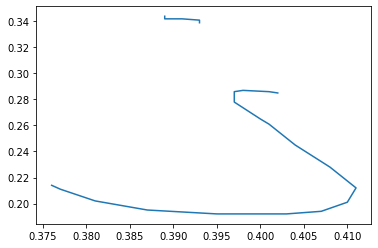

In [5]:
plt.plot(letter_J.X,letter_J.Y)

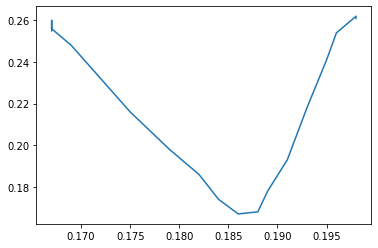

In [6]:
plt.plot(letter_V.X,letter_V.Y)

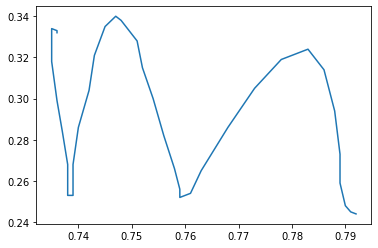

In [7]:
plt.plot(letter_M.X,letter_M.Y)

# **Process Data**

Normalizing Time.

> *The time values have no physical meaning. They represent the number of milliseconds elapsed from the start of the data collection session. This makes it difficult to interpret plots of pen position through time. A more useful time variable would be duration (measured in seconds) since the beginning of each letter.*

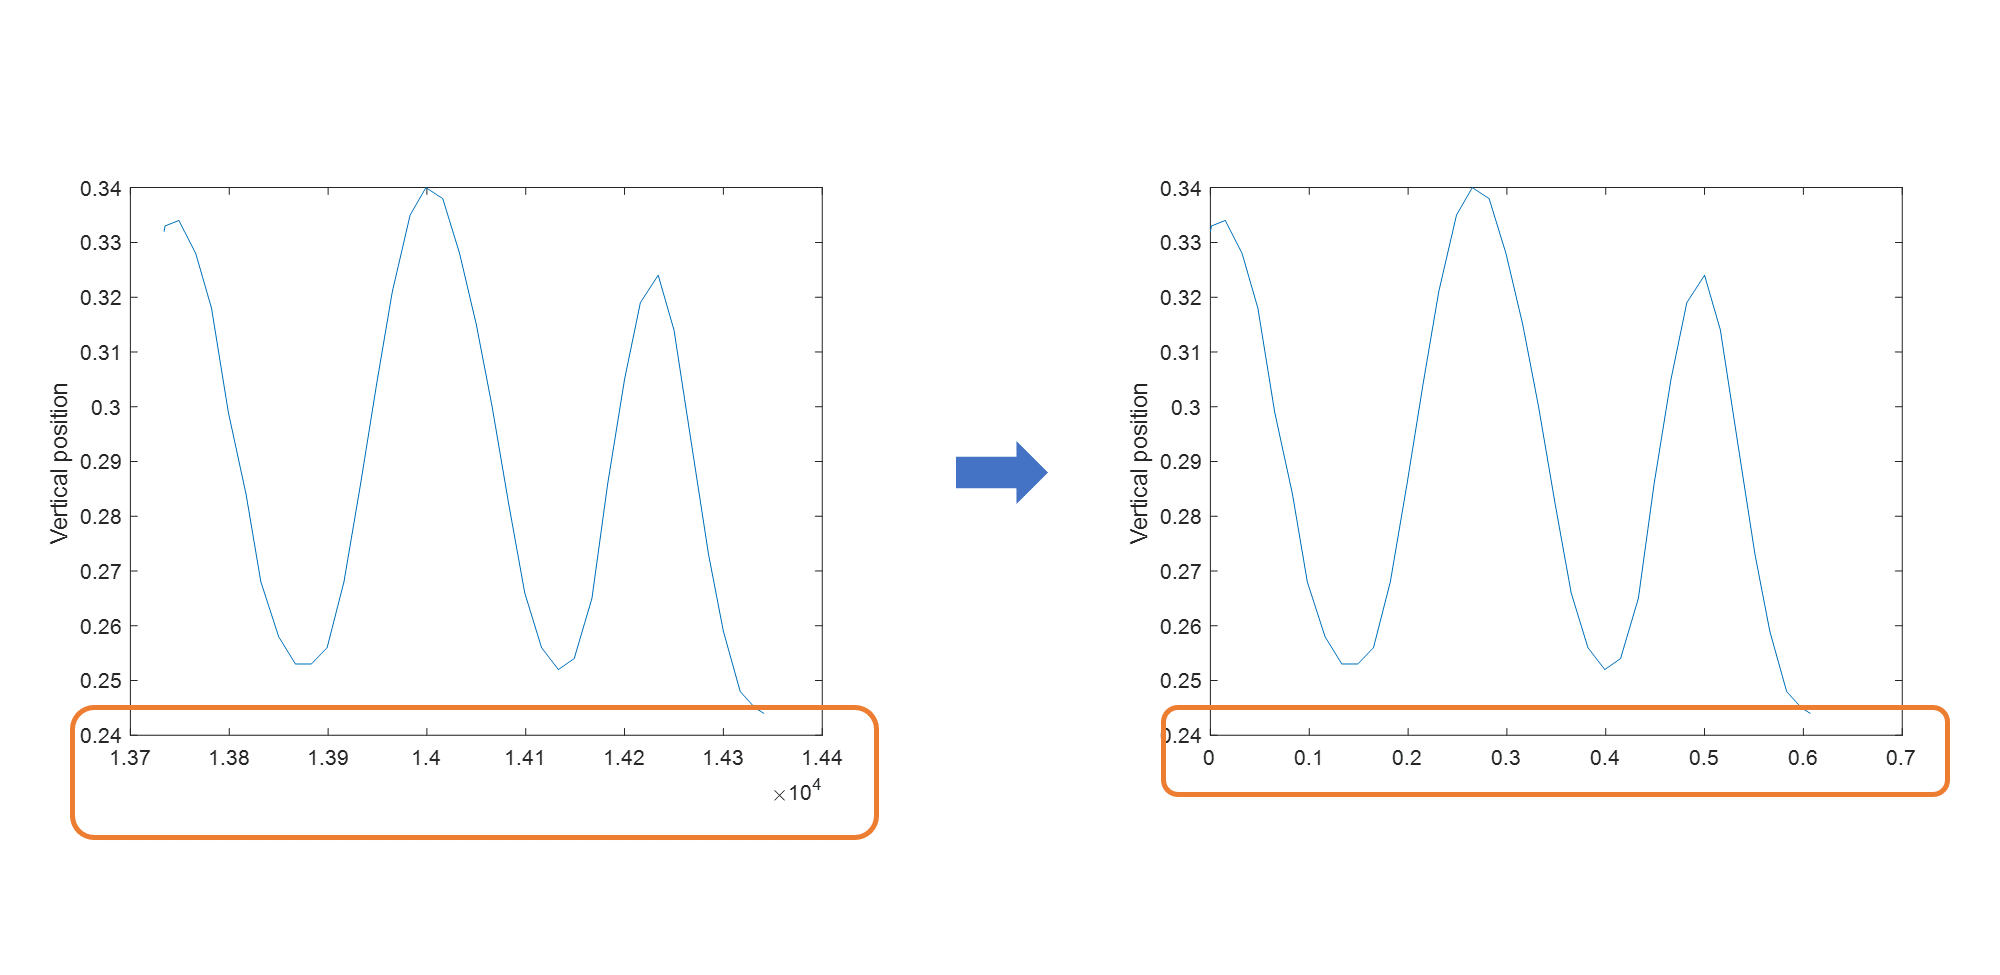






Multiply the values in the X variable of the table letter_M by the aspect ratio of 1.5. Reassign the result back to X so that letter_M contains the corrected data.

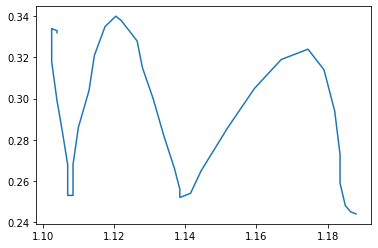

In [8]:
letter_M.X = 1.5*letter_M.X;
plt.plot(letter_M.X,letter_M.Y)

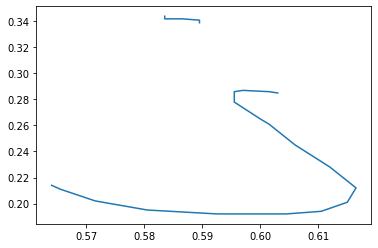

In [9]:
letter_J.X = 1.5*letter_J.X;
plt.plot(letter_J.X,letter_J.Y)

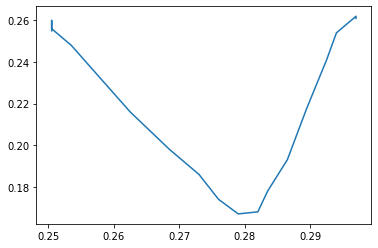

In [10]:
letter_V.X = 1.5*letter_V.X;
plt.plot(letter_V.X,letter_V.Y)

Shift the Time variable of the table letter_M to start at 0 by subtracting the first value from all elements. Divide the result by 1000 to convert to seconds. Reassign the result back to Time so that letter contains the adjusted data.

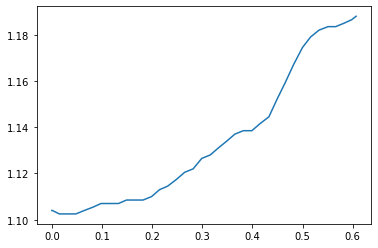

In [11]:
letter_M.Time = letter_M.Time - letter_M.Time[0]
letter_M.Time = letter_M.Time/1000
plt.plot(letter_M.Time,letter_M.X)

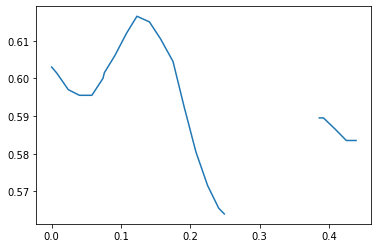

In [12]:
letter_J.Time = letter_J.Time - letter_J.Time[0]
letter_J.Time = letter_J.Time/1000
plt.plot(letter_J.Time,letter_J.X)

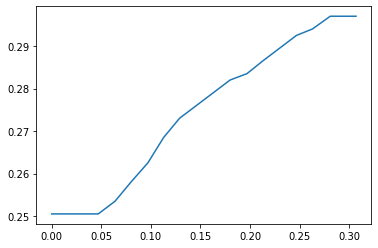

In [13]:
letter_V.Time = letter_V.Time - letter_V.Time[0]
letter_V.Time = letter_V.Time/1000
plt.plot(letter_V.Time,letter_V.X)

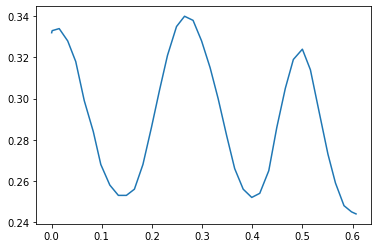

In [14]:
plt.plot(letter_M.Time,letter_M.Y)

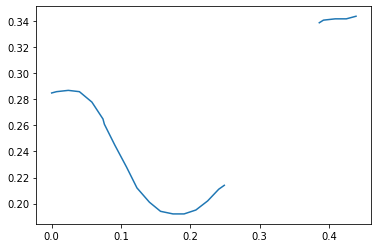

In [15]:
plt.plot(letter_J.Time,letter_J.Y)

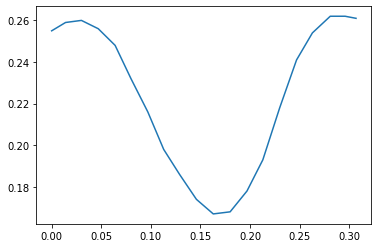

In [16]:
plt.plot(letter_V.Time,letter_V.Y)

# **Extract Features**

Calculating Features.

> What aspects of these letters could be used to distinguish a J from an M or a V? Instead of using the raw signals, the goal is to compute values that distill the entire signal into simple, useful units of information known as features.

*   For the letters J and M, a simple feature might be the aspect ratio (the height of the letter relative to the width). A J is likely to be tall and narrow, whereas an M is likely to be more square.
*   Compared to J and M, a V is quick to write, so the duration of the signal might also be a distinguishing feature.



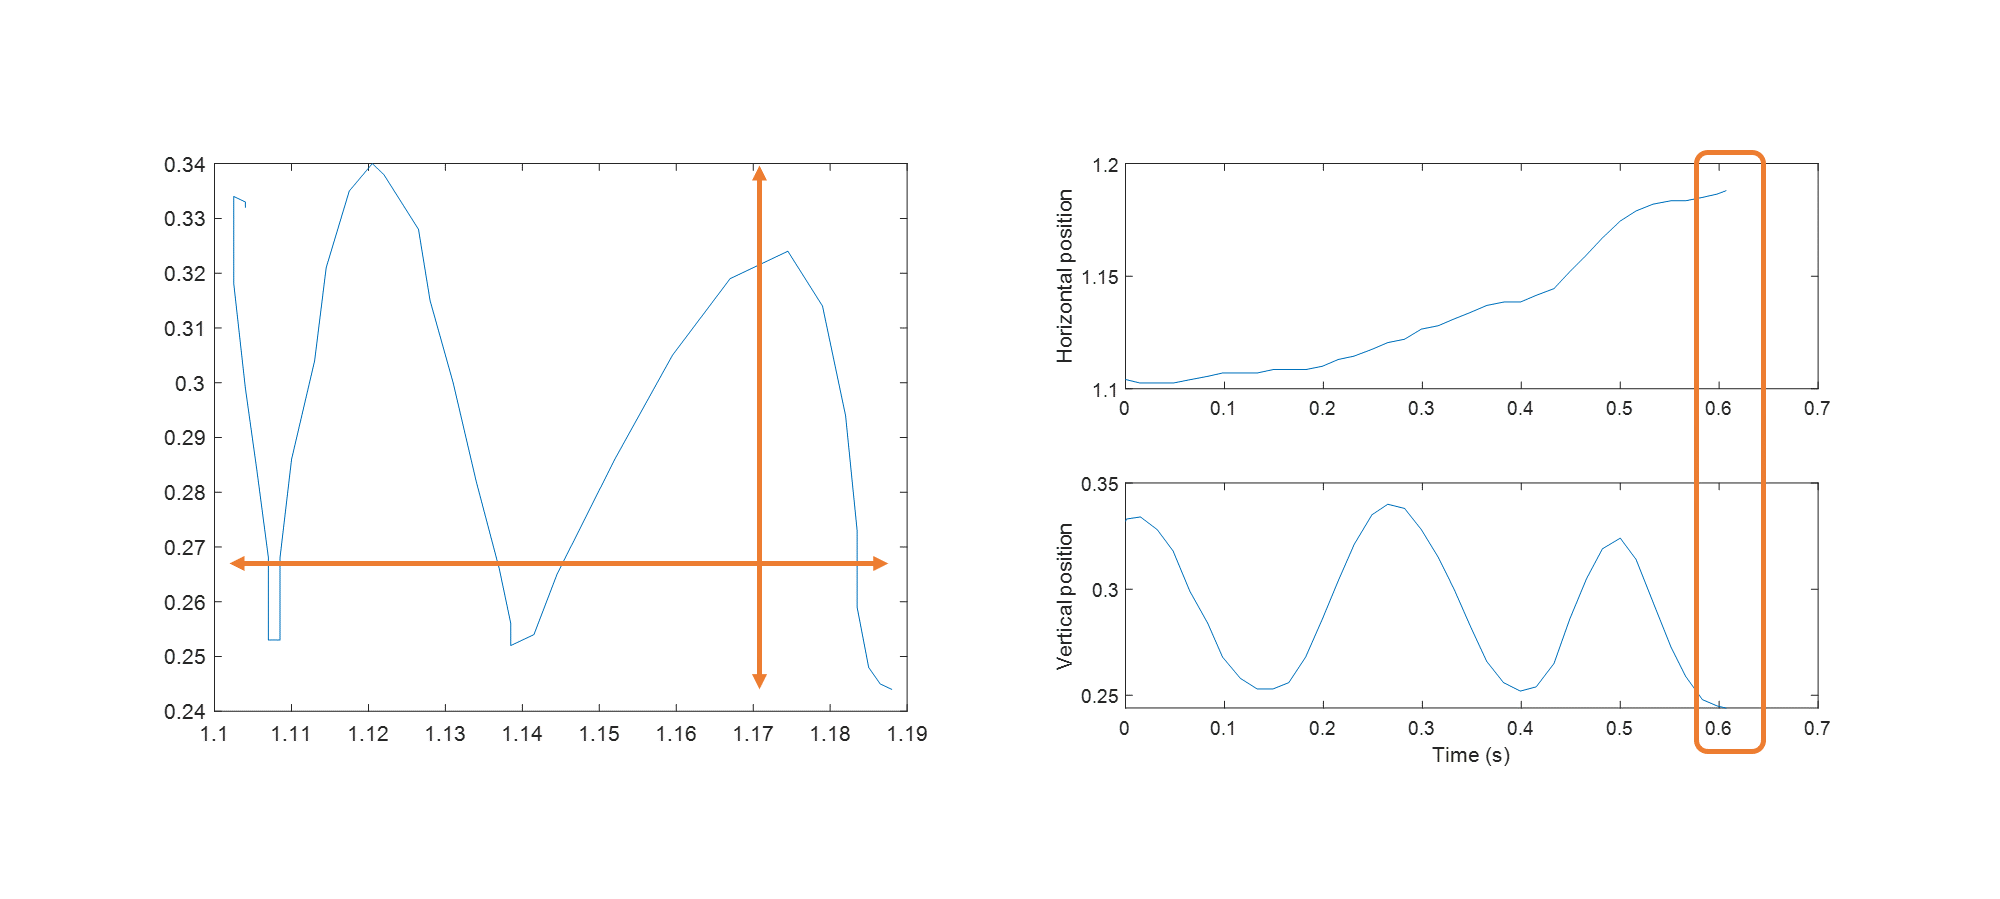

Calculate the time taken to write the letter by extracting the last value of letter_M.Time and storing the result in a variable called dur.

In [17]:
dur = letter_M.Time.iloc[-1]

Calculate the aspect ratio of the letter by dividing the range (max-min) of values of letter_M.Y by the range of values of letter_M.X. Assign the result to a variable called aratio.

In [18]:
aratio = (letter_M.Y.max() - letter_M.Y.min())/(letter_M.X.max() - letter_M.X.min())

Viewing Features.

The variable "featuredata" contains a table of the extracted features for 470 letters written by a variety of people. The table features has three variables: AspectRatio and Duration (the two features calculated in the previous section), and Character (the known letter).

Plot data.

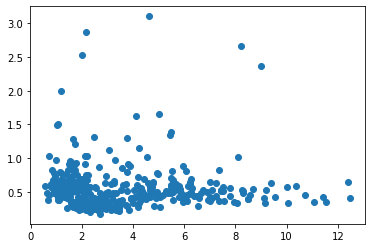

In [19]:
plt.plot(featuredata.AspectRatio,featuredata.Duration,'o')

It's not clear whether these features are sufficient to distinguish the three letters in the data set (J, M, and V). Let's plot a scatter plot where the points are colored according to a grouping variable.

## **Build Model**

A classification model is a partitioning of the space of predictor variables into regions. Each region is assigned one of the output classes. In this simple example with two predictor variables, you can visualize these regions in the plane.
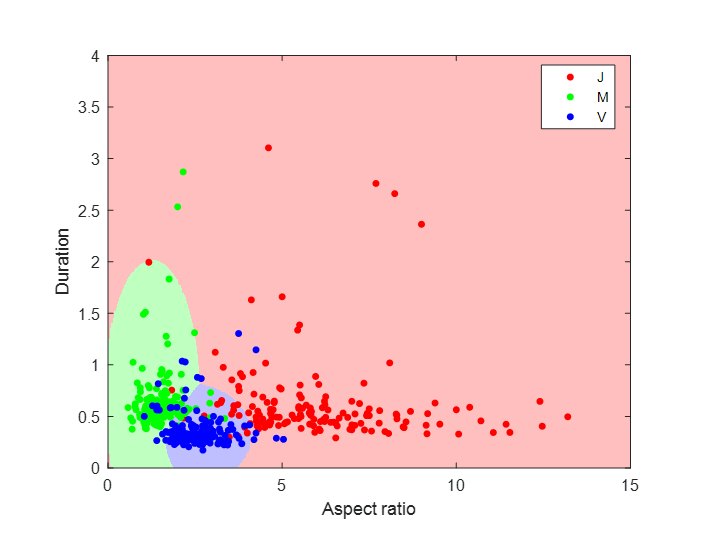

There is no single absolute “correct” way to partition the plane into the classes J, M, and V. Different classification algorithms result in different partitions.
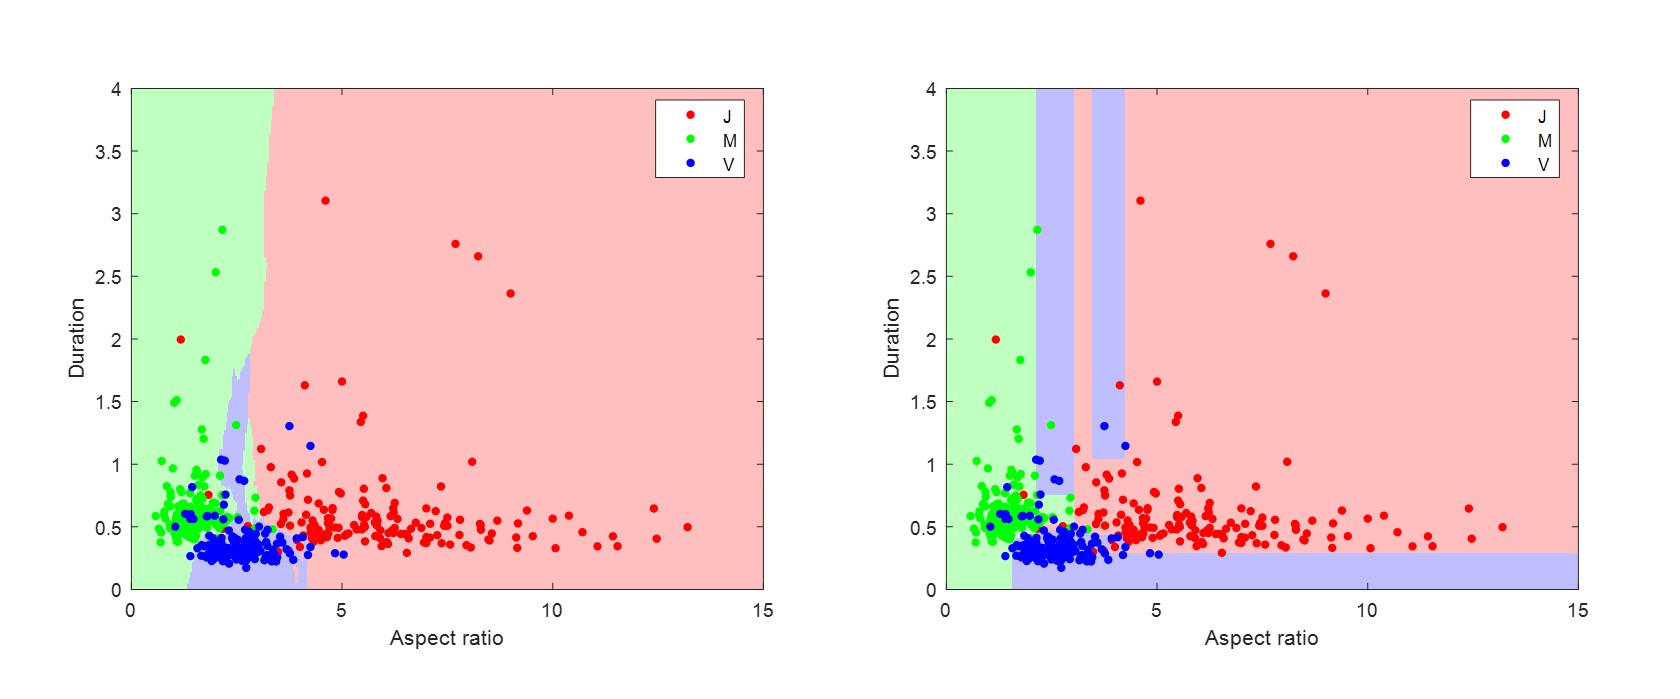

The KNN Classifier (KNeighborsClassifier) is imported from Scikit-learn.

The KNeighborsClassifier has some parameters to improve to improve its performance. At first only n_neighbors is going to be set, the others are to be as default. Later, an optimization analysis could be performed to adjust them.

n_neighbors is set to be 3, what means it will take the specie classification to the average of three closest data.

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)

X_train = featuredata.iloc[:,0:1]
Y_train = featuredata.iloc[:,2]
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=50)

# **Evaluate Model**

In [30]:
X_test = testdata.iloc[:,0:1]
Y_test = testdata.iloc[:,2]
results = knn.predict(X_test)
print(pd.crosstab(Y_test, results, rownames=['Real'], colnames=['Predicted'], margins=True, margins_name='total'))

Predicted  J  M  V  total
Real                     
J          4  0  0      4
M          0  3  1      4
V          1  0  1      2
total      5  3  2     10


In [31]:
from sklearn import metrics
print(metrics.classification_report(Y_test,results,target_names=featuredata.Character.unique(), digits=3))

              precision    recall  f1-score   support

           V      0.800     1.000     0.889         4
           J      1.000     0.750     0.857         4
           M      0.500     0.500     0.500         2

    accuracy                          0.800        10
   macro avg      0.767     0.750     0.749        10
weighted avg      0.820     0.800     0.798        10

